In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [4]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

In [5]:
# importing dataset
df = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv",encoding = "Latin-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
# shape of dataset
df.shape

(41157, 6)

In [7]:
# checking for null values
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
# Datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
df.head().T

,0,1,2,3,4
UserName,3799,3800,3801,3802,3803
ScreenName,48751,48752,48753,48754,48755
Location,London,UK,Vagabonds,NaN,NaN
TweetAt,16-03-2020,16-03-2020,16-03-2020,16-03-2020,16-03-2020
OriginalTweet,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,advice Talk to your neighbours family to excha...,Coronavirus Australia: Woolworths to give elde...,My food stock is not the only one which is emp...,"Me, ready to go at supermarket during the #COV..."
Sentiment,Neutral,Positive,Positive,Positive,Extremely Negative


In [10]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [11]:
df.replace(to_replace="Extremely Negative", value="Negative", inplace=True)
df.replace(to_replace="Extremely Positive", value="Positive", inplace=True)
df.replace(to_replace="Neutral", value="Negative", inplace=True)

In [12]:
df.Sentiment.unique()

array(['Negative', 'Positive'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sentiment = le.fit_transform(df.Sentiment)

In [14]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [15]:
df.Sentiment.value_counts()

0    23111
1    18046
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

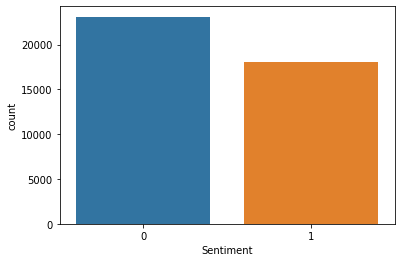

In [16]:
sns.countplot(df.Sentiment)

In [17]:
df1 = df[df.Sentiment==1][:18000]
df2 = df[df.Sentiment==0][:18000]

In [18]:
df_train = df1.append(df2)
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,1
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,1


In [19]:
df_train = df_train[["OriginalTweet","Sentiment"]]
df_train.head()

,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
5,As news of the regionÂs first confirmed COVID...,1
6,Cashier at grocery store was sharing his insig...,1


In [20]:
df_train.shape

(36000, 2)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

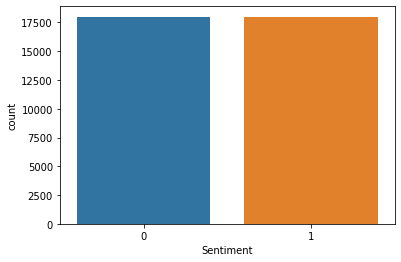

In [21]:
sns.countplot(df_train.Sentiment)

In [22]:
# Tokenization
spacy_tok = spacy.load('en_core_web_sm')
sample_tweet = df_train.OriginalTweet[23]
sample_tweet

'We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #ipTv IPTVLinks #18Movies'

In [23]:
parsed_tweet = spacy_tok(sample_tweet)
parsed_tweet

We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???

#Trials

#Monthly

#Yearly 

And Resonable #Prices / #Subscriptions

Just DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #ipTv IPTVLinks #18Movies

In [24]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

--2021-05-05 15:10:10--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896 (6.7K) [text/plain]
Saving to: ‘explacy.py’

explacy.py          100%[===================>]   6.73K  --.-KB/s    in 0s      

2021-05-05 15:10:11 (28.9 MB/s) - ‘explacy.py’ saved [6896/6896]



In [25]:
import explacy
explacy.print_parse_info(spacy_tok,'Covid-19 has various Symptoms') # text for example

Dep tree Token    Dep type Lemma    Part of Sp
──────── ──────── ──────── ──────── ──────────
   ┌─►   Covid-19 nsubj    Covid-19 PROPN     
┌──┴──   has      ROOT     have     AUX       
│  ┌─►   various  amod     various  ADJ       
└─►└──   Symptoms dobj     symptom  NOUN      


In [26]:
explacy.print_parse_info(spacy_tok,df_train.OriginalTweet[23])

Dep tree          Token         Dep type Lemma        Part of Sp
───────────────── ───────────── ──────── ──────────── ──────────
              ┌─► We            nsubj    -PRON-       PRON      
          ┌┬──┼── have          ROOT     have         AUX       
          ││  └─► AMAZING       dobj     amazing      ADJ       
          ││  ┌─► CHEAP         advmod   cheap        ADJ       
          │└─►└── DEALS         dobj     deal         NOUN      
          └─────► !             punct    !            PUNCT     
     ┌┬┬───────── FOR           ROOT     for          ADP       
     │││     ┌──► THE           det      the          DET       
     │││     │┌─► #             nmod     #            SYM       
     │││  ┌─►└┴── COVID2019     nsubj    COVID2019    PUNCT     
     ││└─►└┬──┬── going         pcomp    go           VERB      
     ││    │  └─► on            prt      on           ADP       
     ││    │  ┌─► to            aux      to           PART      
     ││    └─►├── help   

In [27]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_tweet):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,We,-PRON-,PRON,PRP,nsubj,Xx,True,True,False
1,have,"(have,)",AUX,VBP,ROOT,xxxx,True,True,False
2,AMAZING,"(amazing,)",ADJ,JJ,dobj,XXXX,True,False,False
3,CHEAP,"(cheap,)",ADJ,JJ,advmod,XXXX,True,False,False
4,DEALS,"(deal,)",NOUN,NNS,dobj,XXXX,True,False,False
5,!,"(!,)",PUNCT,.,punct,!,False,False,True
6,FOR,"(for,)",ADP,IN,ROOT,XXX,True,True,False
7,THE,"(the,)",DET,DT,det,XXX,True,True,False
8,#,"(#,)",SYM,$,nmod,#,False,False,True
9,COVID2019,"(COVID2019,)",PUNCT,:,nsubj,XXXXdddd,False,False,False


In [28]:
spacy.explain('GPE')

'Countries, cities, states'

 **Dependency Parsing**:
* Syntactic Parsing or Dependency parsing is process of identifying sentences and assigning a syntactic structure to it. As in subject combined with object makes a sentence. Spacy provides a sparse tree which can be used to generate this structure.

**Sentence Boundary Detection**:
* Figuring out where sentences start and ends is important in NLP.

In [29]:
sentence_spans = list(parsed_tweet)
sentence_spans

[We,
 have,
 AMAZING,
 CHEAP,
 DEALS,
 !,
 FOR,
 THE,
 #,
 COVID2019,
 going,
 on,
 to,
 help,
 you,
 ?,
 ?,
 ?,
 
 ,
 #,
 Trials,
 
 ,
 #,
 Monthly,
 
 ,
 #,
 Yearly,
 
 ,
 And,
 Resonable,
 #,
 Prices,
 /,
 #,
 Subscriptions,
 
 ,
 Just,
 DM,
 US,
 !,
 #,
 bestiptv,
 #,
 iptv,
 #,
 Service,
 #,
 Iptv,
 #,
 iptvdeals,
 #,
 Cheap,
 #,
 ipTV,
 #,
 Football,
 #,
 HD,
 #,
 Movies,
 #,
 Adult,
 #,
 Cinema,
 #,
 hotmovies,
 #,
 ipTv,
 IPTVLinks,
 #,
 18Movies]

In [30]:
displacy.render(parsed_tweet, style='dep',jupyter=True, options={"distance":140})

In [31]:
!pip install scattertext
import scattertext as st
nlp = spacy.load('en',disable_pipes=["tagger","ner"])

In [32]:
df_train.head()

,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
5,As news of the regionÂs first confirmed COVID...,1
6,Cashier at grocery store was sharing his insig...,1


In [33]:
df_train['parsed'] = df_train.OriginalTweet.apply(nlp)
corpus = st.CorpusFromParsedDocuments(df_train,category_col="Sentiment", parsed_col="parsed").build()

In [34]:
df_train.head()

,OriginalTweet,Sentiment,parsed
1,advice Talk to your neighbours family to excha...,1,"(advice, Talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,1,"(Coronavirus, Australia, :, Woolworths, to, gi..."
3,My food stock is not the only one which is emp...,1,"(My, food, stock, is, not, the, only, one, whi..."
5,As news of the regionÂs first confirmed COVID...,1,"(As, news, of, the, regionÂs, first, confirme..."
6,Cashier at grocery store was sharing his insig...,1,"(Cashier, at, grocery, store, was, sharing, hi..."


**SpaCy Text Categorizer**:
* We will train convolutional neural network text classifier on our Coronavirus Tweets using spaCy's new TextCategorizer component.
* SpaCy provides classification model with multiple labels,non_mutually exclusive labels.The TextCategorizer uses its own CNN to balance weights and other pipeline components.

In [35]:
df_train['tuples'] = df_train.apply(lambda row: (row["OriginalTweet"], row["Sentiment"]), axis=1)
train = df_train["tuples"].tolist()
train[:6]

[('advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
  1),
 ('Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
  1),
 ("My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
  1),
 ('As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU',
  1),
 ('Cashier

In [36]:
#functions from spaCy documentation
def load_data(limit=0, split=0.8):
    train_data = train
    np.random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{'POSITIVE': bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])

def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 1e-8  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 1e-8  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    return {'textcat_p': precision, 'textcat_r': recall, 'textcat_f': f_score}

#("Number of texts to train from","t" , int)
n_texts=30000
#You can increase texts count if you have more computational power.

#("Number of training iterations", "n", int))
n_iter=10

In [37]:
nlp = spacy.load('en_core_web_sm')

In [38]:
# add the text classifier to the pipeline if it doesn't exist
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe('textcat')
    nlp.add_pipe(textcat, last=True)
# otherwise, get it, so we can add labels to it
else:
    textcat = nlp.get_pipe('textcat')

# add label to text classifier
textcat.add_label('POSITIVE')

# load the dataset
print("Loading Covid Tweets data...")
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
print("Using {} examples ({} training, {} evaluation)"
      .format(n_texts, len(train_texts), len(dev_texts)))
train_data = list(zip(train_texts,
                      [{'cats': cats} for cats in train_cats]))

Loading Covid Tweets data...
Using 30000 examples (24000 training, 6000 evaluation)


In [39]:
# get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    print("Training the model...")
    print('{:^5}\t{:^5}\t{:^5}\t{:^5}'.format('LOSS', 'P', 'R', 'F'))
    for i in range(n_iter):
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(train_data, size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2,
                       losses=losses)
        with textcat.model.use_params(optimizer.averages):
            # evaluate on the dev data split off in load_data()
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}'  # print a simple table
              .format(losses['textcat'], scores['textcat_p'],
                      scores['textcat_r'], scores['textcat_f']))

Training the model...
LOSS 	  P  	  R  	  F  
10.769	0.767	0.750	0.758
6.048	0.782	0.839	0.810
4.192	0.811	0.871	0.840
2.898	0.844	0.860	0.852
1.990	0.856	0.860	0.858
1.594	0.856	0.856	0.856
1.184	0.866	0.846	0.856
0.978	0.867	0.841	0.854
0.860	0.857	0.851	0.854
0.756	0.854	0.854	0.854


In [57]:
test_text1 = "Mercedes is going to launch its new Car this weekend."
test_text2 = "Coronavirus is grown to mutate itself."
doc = nlp(test_text1)
test_text1, doc.cats

('Mercedes is going to launch its new Car this weekend.',
 {'POSITIVE': 0.01118522696197033})

In [58]:
df_train["OriginalTweet"][2900]

'Scammers often prey on people in the most difficult situations If you re contacted by someone offering to recover your money for an event or a holiday look out for the signs of a potential'

In [59]:
doc3 = nlp(df_train["OriginalTweet"][2900])

In [60]:
df_train["OriginalTweet"][2900], doc3.cats

('Scammers often prey on people in the most difficult situations If you re contacted by someone offering to recover your money for an event or a holiday look out for the signs of a potential',
 {'POSITIVE': 0.11213336139917374})

In [63]:
df_train["OriginalTweet"][26770]

'Started buying some stock in companies that have taken a beating over #coronavirus. Great prices compared to 2-3 months ago.'

In [64]:
doc4 = nlp(df_train["OriginalTweet"][26770])
df_train["OriginalTweet"][26770], doc4.cats

('Started buying some stock in companies that have taken a beating over #coronavirus. Great prices compared to 2-3 months ago.',
 {'POSITIVE': 0.9261859655380249})

In [66]:
doc5 = nlp(df_train["OriginalTweet"][12500])
df_train["OriginalTweet"][12500], doc5.cats

("Someone I know potentially has Covid-19, they are going to run out of food in 2-3 days. \r\r\n\r\r\nThey can't get anything delivered due to overwhelming demand and don't know anyone in the area that can help. \r\r\n\r\r\nWhat are they supposed to do?",
 {'POSITIVE': 0.9915681481361389})

* Now, we can apply this model to our Test dataset and get respective results whether tweets are related to coronavirus or not.

Author: Purvit Vashishtha